Created 'term-test-1-result.csv' successfully.
Created 'term-test-2-result.csv' successfully.
Merged DataFrame:
  Registration Number      Name  TT-1 Marks  TT-2 Marks
0               S1001  Student1           2          18
1               S1002  Student2           2          18
2               S1003  Student3          19           4
3               S1004  Student4          20          19
4               S1005  Student5           7           3
DataFrame with Best and Average TT Marks:
  Registration Number      Name  TT-1 Marks  TT-2 Marks  Best TT Marks  \
0               S1001  Student1           2          18             18   
1               S1002  Student2           2          18             18   
2               S1003  Student3          19           4             19   
3               S1004  Student4          20          19             20   
4               S1005  Student5           7           3              7   

   Average TT Marks  
0              10.0  
1              10.0  

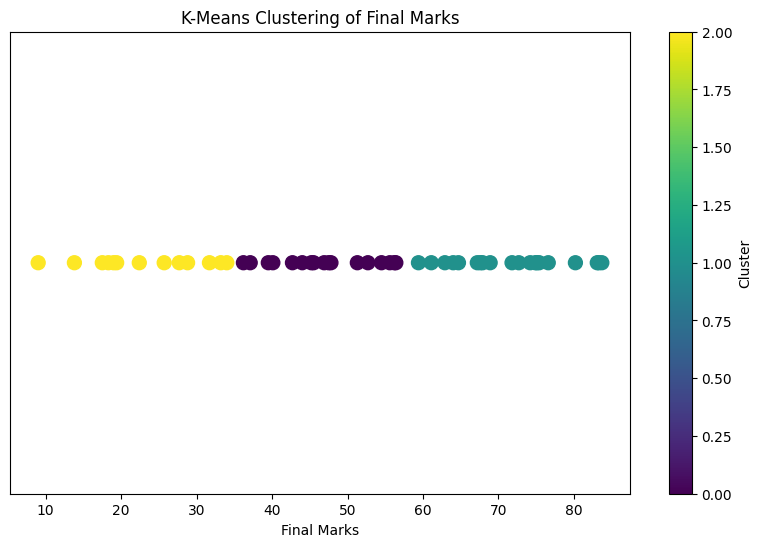

In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Create 'term-test-1-result.csv'

# Number of students
num_students = 50

# Generate Registration Numbers
reg_numbers = ['S' + str(1001 + i) for i in range(num_students)]

# Generate Names
names = ['Student' + str(i + 1) for i in range(num_students)]

# Generate TT-1 Marks (Random integers between 0 and 20)
tt1_marks = np.random.randint(0, 21, size=num_students)

# Create DataFrame for TT-1
tt1_df = pd.DataFrame({
    'Registration Number': reg_numbers,
    'Name': names,
    'TT-1 Marks': tt1_marks
})

# Save to CSV
tt1_df.to_csv('term-test-1-result.csv', index=False)

print("Created 'term-test-1-result.csv' successfully.")

# Step 2: Create 'term-test-2-result.csv'

# Generate TT-2 Marks (Random integers between 0 and 20)
tt2_marks = np.random.randint(0, 21, size=num_students)

# Create DataFrame for TT-2
tt2_df = pd.DataFrame({
    'Registration Number': reg_numbers,
    'Name': names,
    'TT-2 Marks': tt2_marks
})

# Save to CSV
tt2_df.to_csv('term-test-2-result.csv', index=False)

print("Created 'term-test-2-result.csv' successfully.")

# Step 3: Load and Merge DataFrames

# Load CSV files
tt1_df = pd.read_csv('term-test-1-result.csv')
tt2_df = pd.read_csv('term-test-2-result.csv')

# Merge DataFrames on 'Registration Number' and 'Name'
merged_df = pd.merge(tt1_df, tt2_df, on=['Registration Number', 'Name'])

# Verify the merge
print("Merged DataFrame:")
print(merged_df.head())

# Step 4: Calculate Best and Average Term Test Marks

# Calculate Best TT Marks
merged_df['Best TT Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)

# Calculate Average TT Marks
merged_df['Average TT Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)

# Verify the calculations
print("DataFrame with Best and Average TT Marks:")
print(merged_df.head())

# Step 5: Drop 'TT-1 Marks' and 'TT-2 Marks' Columns

# Drop the specified columns
merged_df.drop(columns=['TT-1 Marks', 'TT-2 Marks'], inplace=True)

# Verify the drop
print("DataFrame after dropping individual term test marks:")
print(merged_df.head())

# Step 6: Create 'attendance-term-final.csv' and Merge

# Generate Attendance Marks (0 to 10)
attendance_marks = np.random.randint(0, 11, size=num_students)

# Generate Term Final Marks (0 to 100)
term_final_marks = np.random.randint(0, 101, size=num_students)

# Create DataFrame for Attendance and Term Final Marks
attendance_df = pd.DataFrame({
    'Registration Number': reg_numbers,
    'Name': names,
    'Attendance Marks': attendance_marks,
    'Term Final Marks': term_final_marks
})

# Save to CSV
attendance_df.to_csv('attendance-term-final.csv', index=False)

print("Created 'attendance-term-final.csv' successfully.")

# Load the CSV file
attendance_df = pd.read_csv('attendance-term-final.csv')

# Merge with the existing DataFrame
final_df = pd.merge(merged_df, attendance_df, on=['Registration Number', 'Name'])

# Verify the merge
print("Final DataFrame after merging attendance and term final marks:")
print(final_df.head())

# Step 7: Compute Final Marks and Save to 'final result.csv'

# Calculate Final Marks
final_df['Final Marks'] = (final_df['Term Final Marks'] * 0.7) + \
                          final_df['Average TT Marks'] + \
                          final_df['Attendance Marks']

# Round Final Marks to 2 decimal places
final_df['Final Marks'] = final_df['Final Marks'].round(2)

# Save to 'final result.csv'
final_df.to_csv('final result.csv', index=False)

print("Saved final results to 'final result.csv'.")

# Step 8: K-Means Clustering and Visualization

# Prepare data for clustering
X = final_df[['Final Marks']]

# Choose number of clusters
k = 3  # You can change this between 2 and 5

# Initialize KMeans
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit and predict clusters
final_df['Cluster'] = kmeans.fit_predict(X)

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(final_df['Final Marks'], [0]*num_students, c=final_df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Final Marks')
plt.title('K-Means Clustering of Final Marks')
plt.colorbar(label='Cluster')
plt.yticks([])  # Hide y-axis ticks
plt.show()
